In [14]:
#Importing...

import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize



#Reading the .mat file

mat_contents = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex5\ex5\ex5data1.mat')

mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [15]:
#Extracting the contents

# Training Set
X = mat_contents['X']
Y = mat_contents['y']

#Cross Validation Set
Xval = mat_contents['Xval']
Yval = mat_contents['yval']

#Test Set
Xtext = mat_contents['Xtest']
Ytest = mat_contents['ytest']

m,n = X.shape

print(X.shape)
print(Y.shape)

(12, 1)
(12, 1)


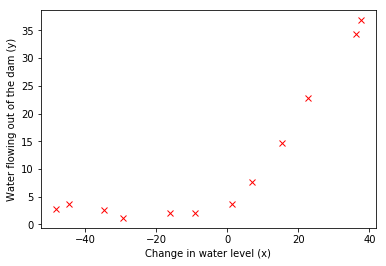

In [16]:
# 1.1 VISUALIZING THE DATA

#Plotting the graph

plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')

plt.plot(X,Y,'rx')

In [17]:
#calculating htheta(x)
def hypothesis(theta,X):
    return X.dot(theta)

In [18]:
#1.2 Regularized linear regression cost function

#calculating the cost of the regularized linear regression
def linearRegCostFunction(theta,X, Y, Lambda,m):
    theta = theta.reshape(2,1)
    
    #computing the term 1 of the cost function
    term1 = (((hypothesis(theta,X) - Y)**2).sum())/(2*m)
    
   
    #computing regularized term for the cost function
    
                              #here column 1 i,e theta[0]
                              #not be included so slicing is done
    term2 = (Lambda/(2*m)) * (theta[1]**2)
    
    #computing the cost term1 + term2(regularized term)
    cost = term1 +  term2
    
    return cost

 #COMPUTING THE GRADIENTS
def gradient(theta,X, Y, Lambda,m):
   
    theta = theta.reshape(2,1)
    
    #computing (htheta(x) - y)/m
    hypMinusY = (hypothesis(theta,X) - Y)/m
    
    #computing gradient for theta[0]
    grad1 = hypMinusY.sum() 
    
    #computing gradient for theta[1]
    grad2 = (hypMinusY*X[:,1:]).sum() + (Lambda/m)*(theta[1])
    
    return (np.array([grad1,grad2])).flatten()

In [19]:
#defining the theta
theta = np.array([[1],[1]])

#calculating the cost and gradients for Lambda = 1
J = linearRegCostFunction( theta.flatten(),np.insert(X,0,1,1), Y, 1,m)
grad = gradient(theta.flatten(),np.insert(X,0,1,1), Y, 1,m)
print('Cost : ', J) 
print('Gradients : ',grad)


Cost :  [303.99319222]
Gradients :  [-15.30301567 598.25074417]


In [20]:
#1.4 Fitting linear regression(Train Linear Regression)
def trainLinearReg(X, y, Lambda,msize):
    
    #initializing thetas with the zeros
    initial_theta = np.zeros((2,1))
    
    #Calling the optimize function
    import scipy
                                    #it will call the our                           #computing with the 
                                    #optimize function                              #gradient
    result = scipy.optimize.fmin_cg(linearRegCostFunction,x0=initial_theta.flatten(),fprime = gradient,\
                args=(X, y, Lambda,msize),maxiter=200,disp=True,full_output=True) 
    
    return(result[0])


In [21]:
Lambda = 0
FinalTheta = trainLinearReg(np.insert(X,0,1,1), Y, Lambda,m)

print(FinalTheta)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
[13.08790351  0.36777923]


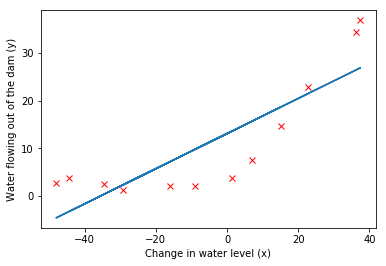

In [22]:
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')


plt.plot(X,Y,'rx')
plt.plot(X,np.insert(X,0,1,1).dot(FinalTheta),'-')

In [23]:
FinalTheta.shape

(2,)

In [31]:
def learningCurve(X,Y,Xval,Yval,Lambda):
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))

    for i in range(1,m+1):
        
        #Learning parameter for i training size
        Theta = trainLinearReg(X[0:i,:], Y[0:i], Lambda,i)

        
        #training error
        error_train[i-1] = linearRegCostFunction(Theta,X[0:i,:],Y[0:i],Lambda,i)
        
        #Cross validation error
        error_val[i-1] = linearRegCostFunction(Theta,Xval,Yval,Lambda,21)
        
    return error_train,error_val


In [32]:
Lambda = 0
error_train, error_val = learningCurve(np.insert(X,0,1,1), Y,np.insert(Xval,0,1,1), Yval,Lambda);

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 22
         Function evaluations: 34
        

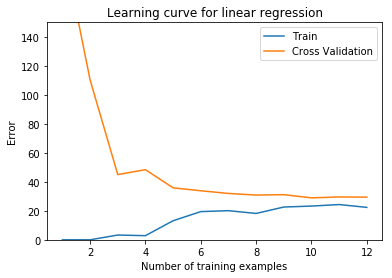

In [33]:
#Plotting graph between J(train) error and J(Cross validation) with training set size
plt.title('Learning curve for linear regression')

plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.ylim(0,150)

plt.plot(np.arange(1,m+1),error_train,'-',label = 'Train')
plt.plot(np.arange(1,m+1),error_val,'-',label = 'Cross Validation')

plt.legend()